### Day 12: Duality in Linear Programming and Sensitivity Analysis
In this lesson we learn that every linear programming (LP) problem (the "primal") has a corresponding "dual" problem. The optimal objective values of the primal and dual are equal (under strong duality). The dual variables, also called shadow prices, show how much the objective would change if you relaxed a constraint by one unit.  

Sensitivity analysis uses these ideas to study how changes in parameters (like the right-hand sides of constraints) affect the optimal solution and the objective value.  

We will work with a simple LP example. Because most LP solvers (like SciPy’s linprog) are minimizers, we first convert a maximization problem to a minimization one.

Consider the following problem:

Maximize Profit: P(x, y) = 3x + 5y  
Subject to: 2x + 3y <= 12  
x + 2y <= 8  
x, y >= 0  

To solve it with linprog, we convert it to:

Minimize f(x, y) = -3x - 5y  
Subject to: 2x + 3y <= 12  
x + 2y <= 8  
x, y >= 0

The basic idea of sensitivity analysis in linear programming applies regardless of the number of constraints. For each linear constraint, you can independently perturb its right-hand side and observe the change in the optimal objective value. This gives you the corresponding dual variable (or shadow price) for that constraint.

In a problem with many constraints, you would perform this analysis for each one. The dual variables collectively indicate which resources (constraints) are binding and how much the objective would improve if you relaxed each one by one unit.

In [134]:
import numpy as np

# Linprog is a minimizer
from scipy.optimize import linprog

In [131]:
# Set the objective function and constraints in matrix form

# Coefficients
c = [-3, -5]

# Inequality lefthand side
A = [
    [2, 3],
    [1, 2]
]

# Inequality righthand side
b = [12, 8]

# Minimum bounds
bounds = [(0, None), (0, None)]


In [132]:
duality_analysis = {}

for x in range (0, 30):
    for y in range (0, 30):
        result = linprog(
            c=coefficients,
            A_ub=A,
            b_ub=[x,y],
            bounds=bounds,
            method="highs"
            )
        duality_analysis[result.x[0], result.x[1]] = result.fun
        
print(duality_analysis)

# print("Optimizer found optimal value at:", result.x)
# print("Optimizer found minimized function at:", result.fun)

{(np.float64(0.0), np.float64(-0.0)): 0.0, (np.float64(0.0), np.float64(0.3333333333333333)): -1.6666666666666665, (np.float64(1.0), np.float64(-0.0)): -3.0, (np.float64(0.0), np.float64(0.6666666666666666)): -3.333333333333333, (np.float64(0.0), np.float64(1.0)): -5.0, (np.float64(2.0), np.float64(-0.0)): -6.0, (np.float64(0.0), np.float64(1.3333333333333333)): -6.666666666666666, (np.float64(0.9999999999999997), np.float64(1.0000000000000002)): -8.0, (np.float64(0.0), np.float64(1.6666666666666667)): -8.333333333333334, (np.float64(3.0), np.float64(-0.0)): -9.0, (np.float64(0.0), np.float64(2.0)): -10.0, (np.float64(3.000000000000002), np.float64(0.0)): -9.000000000000007, (np.float64(1.9999999999999996), np.float64(1.0000000000000002)): -11.0, (np.float64(0.0), np.float64(2.3333333333333335)): -11.666666666666668, (np.float64(4.0), np.float64(-0.0)): -12.0, (np.float64(0.9999999999999993), np.float64(2.0000000000000004)): -13.0, (np.float64(0.0), np.float64(2.6666666666666665)): -13

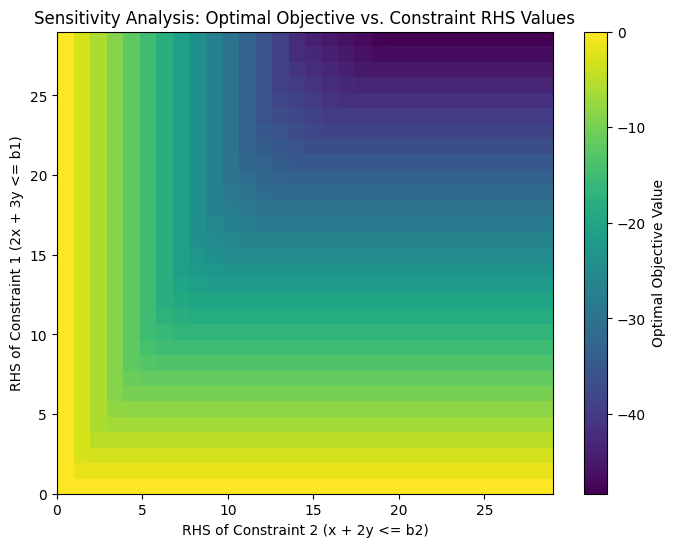

In [133]:
# Visualize the output

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the LP parameters (assuming these are the ones you used)
# For example, we consider the problem:
#   Minimize: -3x - 5y   (which is equivalent to maximizing 3x+5y)
#   Subject to: 2x + 3y <= b1
#               x + 2y <= b2
#               x, y >= 0
coefficients = [-3, -5]
A = [[2, 3],
     [1, 2]]
bounds = [(0, None), (0, None)]

# Define grid size for sensitivity analysis
grid_size = 30
# Create a 2D array to store the optimal objective values
objective_grid = np.empty((grid_size, grid_size))
# Also create arrays for the b1 and b2 values
b1_values = np.arange(grid_size)  # for constraint 1 (2x+3y <= b1)
b2_values = np.arange(grid_size)  # for constraint 2 (x+2y <= b2)

# Loop over possible RHS values for each constraint and solve the LP
for i, b1 in enumerate(b1_values):
    for j, b2 in enumerate(b2_values):
        res = linprog(c=coefficients, A_ub=A, b_ub=[b1, b2], bounds=bounds, method="highs")
        objective_grid[i, j] = res.fun

# Create a heatmap: x-axis is b2, y-axis is b1, and color is the objective value
plt.figure(figsize=(8, 6))
# We use 'origin=lower' so that the smallest b1 is at the bottom
im = plt.imshow(objective_grid, origin='lower', extent=[b2_values[0], b2_values[-1], b1_values[0], b1_values[-1]],
                aspect='auto', cmap='viridis')
plt.colorbar(im, label='Optimal Objective Value')
plt.xlabel('RHS of Constraint 2 (x + 2y <= b2)')
plt.ylabel('RHS of Constraint 1 (2x + 3y <= b1)')
plt.title('Sensitivity Analysis: Optimal Objective vs. Constraint RHS Values')
plt.show()
